In [1]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#0～9の手書き文字のデータセット
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


学習用データ画像枚数： 60000
評価用データ画像枚数： 10000
画像サイズ： (60000, 28, 28)


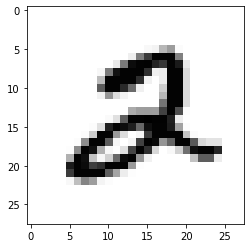

In [2]:
%matplotlib inline

print("学習用データ画像枚数：",len(train_images))
print("評価用データ画像枚数：",len(test_images))

print("画像サイズ：",train_images.shape)

#画像を表示してみる
fig = plt.Figure()
plt.imshow(train_images[5].reshape(28, 28), cmap='Greys')
plt.show()


#画像データの正規化
train_images_norm, test_images_norm = train_images / 255.0, test_images / 255.0

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),    #28x28の行列を784次元のベクトルに変換
 tf.keras.layers.Dense(128, activation='relu'),    #出力が128次元（ノード128個）の全結合層、活性化関数relu
 tf.keras.layers.Dropout(0.2),                     #DropOutを追加
 tf.keras.layers.Dense(10, activation='softmax')   #出力が10次元の全結合層、活性化関数softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
#epochs：学習を繰り返す回数、batch_size：ミニバッチ学習に使うデータ数　学習データ数/batch_size デフォルト値:32
result = model.fit(train_images_norm, train_labels, epochs=5,batch_size=32) 



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9818
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9872


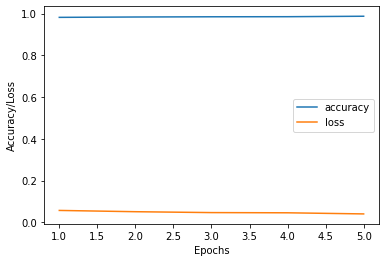

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs = 5
plt.plot(range(1, epochs+1), result.history['accuracy'], label="accuracy")
plt.plot(range(1, epochs+1), result.history['loss'], label="loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [7]:
#評価データで評価する
model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 0s - loss: 0.0681 - accuracy: 0.9808


[0.06808506697416306, 0.9807999730110168]

[[1.9485098e-08 1.2299852e-17 4.9372087e-08 8.4300579e-12 9.9968195e-01
  3.0290190e-11 2.6979353e-07 5.4278180e-06 3.0662398e-10 3.1226312e-04]]


4

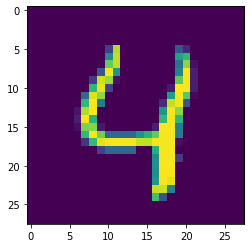

In [8]:
index = 4
plt.imshow(test_images_norm[index])

pred = model.predict(test_images_norm[index][np.newaxis])
print(pred)
np.argmax(pred)

In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

<PIL.Image.Image image mode=L size=28x28 at 0x7FCCDBB92978>
(1, 28, 28, 1)
[[1.7434751e-09 1.8283692e-21 6.9728998e-08 1.4414917e-11 9.3977106e-01
  1.1169623e-05 8.0584083e-04 1.9273123e-04 8.6176384e-13 5.9219118e-02]]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


4

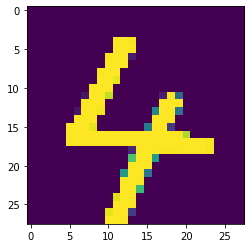

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('sample.png',grayscale=True, target_size=(28,28))
print(img)
img_data = img_to_array(img)
img_data = img_data/255
img_data = img_data[None, ...]


print(img_data.shape)

plt.imshow(img)
pred = model.predict(img_data)
print(pred)
np.argmax(pred)